In [ ]:
# Installing matplotlib
# pip install matplotlib - In CMD line
# !pip install matplotlib - In Jupyter cell
# OR
# %pip install matplotlib - In Jupyter cell

In [ ]:
# Importing Matplotlib
import matplotlib.pyplot as plt
# plt is athe alias name for pyplot
import numpy as np
# np is the alias for numpy
import pandas as pd
# pd is the alias for pandas

import warnings
warnings.filterwarnings("ignore")

Matplotlib is building the font cache; this may take a moment.


In [ ]:
# Loading Dataset
df = pd.read_csv('Bollywood_Movies_Dataset.csv')
# Print the Type of df
print(type(df))
# Show top 5 rows
df.head()  

<class 'pandas.core.frame.DataFrame'>


,Movie_Name,BO_Collection,Budget,Box_Office_Verdict
0,Pyaar Ka Punchnama 2,53.25,25.0,Hit
1,Shandaar,38.28,68.0,Flop
2,Singh is Bliing,74.87,92.0,Flop
3,Jazbaa,24.3,30.0,Flop
4,Talvar,24,22.0,Plus


In [ ]:
df_budget = df.groupby('Box_Office_Verdict').mean().reset_index()
df_budget['Budget']=round(df_budget['Budget']) # Rounding Budget
df_budget

,Box_Office_Verdict,Budget
0,All Time Blockbuster,108.0
1,Average,38.0
2,Blockbuster,40.0
3,Disaster,68.0
4,Flop,34.0
5,Hit,45.0
6,Plus,20.0
7,Semi Hit,75.0
8,Super Hit,60.0


Plotting a normal bar plot of Box_Office_Verdict vs Budget

<BarContainer object of 9 artists>

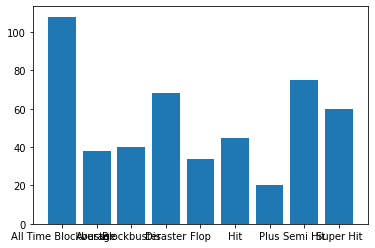

In [ ]:
plt.bar(df_budget['Box_Office_Verdict'],df_budget['Budget'])

Adding xlim, ylim, figure, savefig, label, legend, xlabel, ylabel, title and show to the Plot

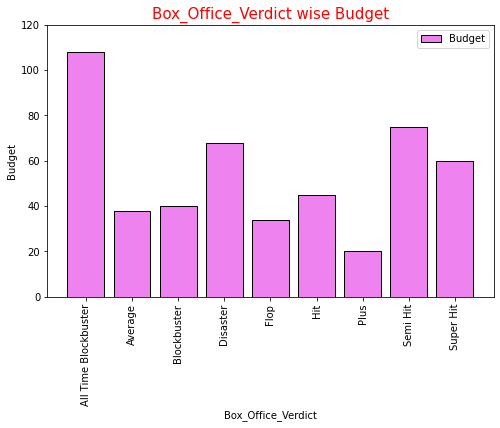

In [ ]:
# Creating a bar plot and applying customization
plt.figure(figsize=(8,5)) # Setting figure size
plt.bar(df_budget['Box_Office_Verdict'],df_budget['Budget'],color='violet'
        ,edgecolor='black',label='Budget') # Customizing Bar with color, edgecolor, label
plt.title('Box_Office_Verdict wise Budget',fontsize=15,color='Red') # Setting title for the plot
plt.xlabel('Box_Office_Verdict') # Setting x-label
plt.ylabel('Budget') # Setting y-label
plt.xticks(rotation=90) # Rotating x-labels by 90 degree
plt.ylim(0,120) # Setting limit of y-axis
plt.legend() # Slowing Legend for the plot
plt.savefig('BoxOfficeVerdict_vs_Budget.png') # Saving the plot
plt.show() # Showing the plot

Add color and edge color to the bars

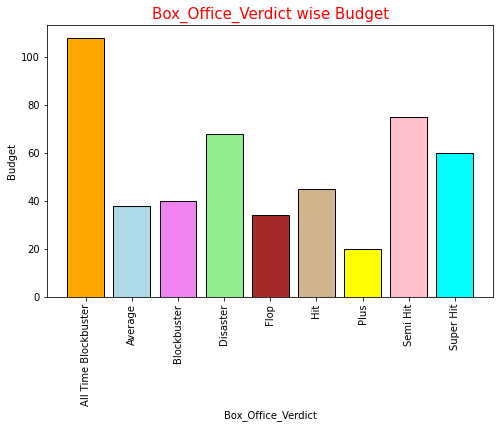

In [ ]:
plt.figure(figsize=(8,5)) # Setting figure size
plt.bar(df_budget['Box_Office_Verdict'],df_budget['Budget'],
        color=['orange','lightblue','violet','lightgreen','brown','tan','yellow','pink','cyan'],
        edgecolor='black') # Customizing Bar with different color, edgecolor
# Setting title for the plot
plt.title('Box_Office_Verdict wise Budget',fontsize=15,color='Red')
plt.xlabel('Box_Office_Verdict') # Setting x-label
plt.ylabel('Budget') # Setting y-label
plt.xticks(rotation=90) # Rotating x-labels by 90 degree
plt.show() # Showing the plot

Adding Text to the Plot

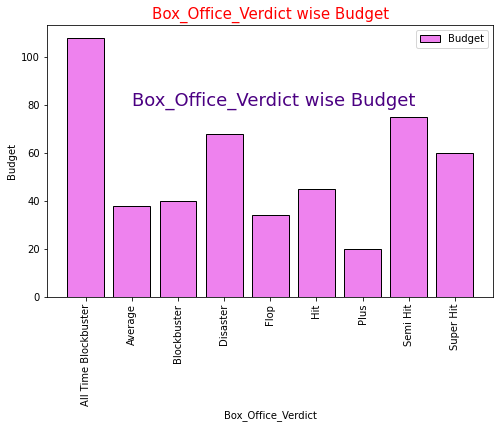

In [ ]:
plt.figure(figsize=(8,5)) # Setting figure size
# Customizing Bar with different color, edgecolor and label
plt.bar(df_budget['Box_Office_Verdict'],df_budget['Budget'],color='violet',edgecolor='black',label='Budget')
# Adding text to the plot and setting position, text, color and fontsize for the text
plt.text(1,80,'Box_Office_Verdict wise Budget',color='indigo',fontsize=18)
# Setting title for the plot
plt.title('Box_Office_Verdict wise Budget',fontsize=15,color='Red')
plt.xlabel('Box_Office_Verdict') # Setting x-label
plt.ylabel('Budget') # Setting y-label
plt.xticks(rotation=90) # Rotating x-labels by 90 degree
plt.legend() # Showing legend for the plot
plt.show() # Showing the plot

Adding Annotations to the Plot

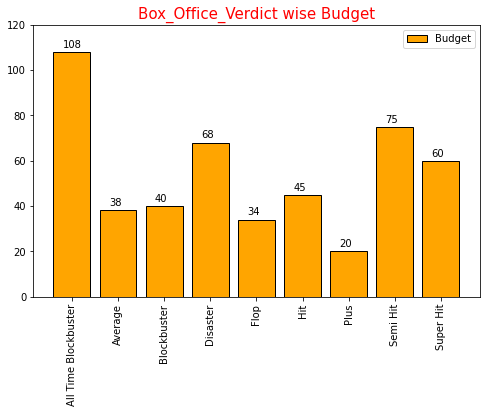

In [ ]:
s = list(range(9))  # s = [0,1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(8,5)) # Setting figure size
# Customizing Bar with different color, edgecolor and label
plt.bar(s,df_budget['Budget'],color='orange',label='Budget',edgecolor='black')
plt.ylim(0,120) # Setting limit for y-axis
for idx,val in enumerate(df_budget['Budget']):  # generates additional counter (idx)
    plt.annotate(xy=[s[idx]-0.2,int(val)+2],text=int(val))
# Rotating x-labels by 90 degree
plt.xticks(s,df_budget['Box_Office_Verdict'],rotation=90) 
# Setting title for the plot
plt.title('Box_Office_Verdict wise Budget',fontsize=15,color='Red')
plt.legend() # Showing legend for the plot
plt.show() # Showing the plot

In [ ]:
# Checking Data type of the dataframe
df.dtypes

Movie_Name             object
BO_Collection          object
Budget                float64
Box_Office_Verdict     object
dtype: object

In [ ]:
# Top 5 movies by BO_Collection , Using nlargest function of pandas
# Convert data type of BO_Collectio from object to float
df['BO_Collection'] = df['BO_Collection'].astype(float) 
df_top_movies=df.nlargest(n=5, columns=['BO_Collection'])
df_top_movies = df_top_movies.set_index('Movie_Name')
df_top_movies

,BO_Collection,Budget,Box_Office_Verdict
Movie_Name,,,
PK,330.83,90.0,All Time Blockbuster
Bajrangi Bhaijaan,318.14,125.0,All Time Blockbuster
Tanu Weds Manu,148.47,40.0,Blockbuster
Baahubali (Hindi),111.38,130.0,Hit
ABCD 2,105.01,60.0,Super Hit


Add xticks, yticks, alpha to the Plot

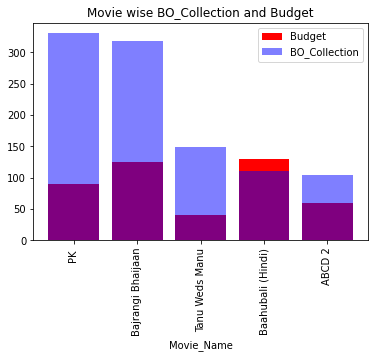

In [ ]:
# Customizing first variable bars with color and label
plt.bar(df_top_movies.index,df_top_movies['Budget'],label='Budget',color='red')
# Customizing second variable bars with color, label and alpha
plt.bar(df_top_movies.index,df_top_movies['BO_Collection'],label='BO_Collection',color='blue',alpha=0.5)
plt.xlabel('Movie_Name') # setting x-lable
plt.xticks(rotation=90) # Rotating x-labels by 90 degree
# Setting title for the plot
plt.title('Movie wise BO_Collection and Budget')
plt.legend() # Showing legend for the plot
plt.show() # Showing the plot

Plot Movie wise BO_Collection and Budget. Represent BO_Collection and Budget on 2 different axis

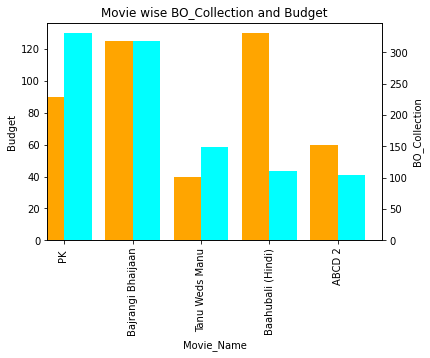

In [ ]:
fig = plt.figure() # setting plt figure
ax = fig.add_subplot(111) # Setting plot axis
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4 # setting width 
# Customizing first variable bars with color, axis, width and position
df_top_movies['Budget'].plot(kind='bar', color='orange', ax=ax, width=width, position=1)
# Customizing second variable bars with color, axis, width and position
df_top_movies['BO_Collection'].plot(kind='bar', color='cyan', ax=ax2, width=width, position=0)
# Setting y-lable for first variable
ax.set_ylabel('Budget')
# Setting y-lable for second variable
plt.xticks(rotation=90) # Rotating x-labels by 90 degree
ax2.set_ylabel('BO_Collection')
# Setting title for the plot
plt.title('Movie wise BO_Collection and Budget')
plt.show() # Showing the plot